In [1]:
import scanpy as sc
import numpy as np
import random
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Marmoset-Priebe/"
# sample_ID = "NW_TX0077-8_S01_L003-001"

adata = sc.read_10x_mtx(data_path)
adata.var_names_make_unique()
# adata.obs["sample_id"] = [sample_ID] * adata.n_obs
adata

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 141756 × 21965
    var: 'gene_ids', 'feature_types'

In [2]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGAACCGCA-1, AAACCCAAGACAACTA-1, AAACCCAAGACATACA-1, AAACCCAAGACCAGAC-1, AAACCCAAGACGCTCC-1, AAACCCAAGAGAAGGT-1, AAACCCAAGAGAATCT-1, AAACCCAAGAGAGCCT-1, AAACCCAAGAGCAACC-1, AAACCCAAGAGTATAC-1, AAACCCAAGATGCTAA-1, AAACCCAAGATGGCAC-1, AAACCCAAGATTAGCA-1, AAACCCAAGATTGATG-1, AAACCCAAGCACTTTG-1, AAACCCAAGCAGCACA-1, AAACCCAAGCCAGACA-1, AAACCCAAGCCGGAAT-1, AAACCCAAGCCTGAGA-1, AAACCCAAGCGACTTT-1, AAACCCAAGCGCACAA-1, AAACCCAAGCGTGTTT-1, AAACCCAAGGACAAGA-1, AAACCCAAGGATACCG-1, AAACCCAAGGATTCAA-1, AAACCCAAGGTACAGC-1, AAACCCAAGGTGATCG-1, AAACCCAAGGTGCGAT-1, AAACCCAAGTAATCCC-1, AAACCCAAGTACTCGT-1, AAACCCAAGTAGGTTA-1, AAACCCAAGTCGGGAT-1, AAACCCAAGTCGTCTA-1, AAACCCAAGTGATTCC-1, AAACCCAAGTGCTCGC-1, AAACCCAAGTGGTTGG-1, AAACCCACAAACGAGC-1, AAACCCACAAAGGCAC-1, AAACCCACAAATAGCA-1, AAACCCACAAATGGAT-1, AAACCCACAACAGATA-1, AAACCCACAACAGCCC-1, AAACCCACAAGAAACT-1, AAACCCACAAGAGGTC-1, AAACCCACAAGAGTAT-1, AAACCCACAAGAGTTA-1, AAACCCACAAGCGGAT-1, AAACCCACAAGTATCC-1, AAACCCACAAGTCATC-1, AAACCCACAAGTGTCT-1, AAACCCACAATTGAAG-1, AAACCCACACACGGAA-1, AAACCCACACATACGT-1, AAACCCACACCCTGTT-1, AAACCCACACCGTGCA-1, AAACCCACACCTTCCA-1, AAACCCACACGACGAA-1, AAACCCACACGGCCAT-1, AAACCCACACGGTGAA-1, AAACCCACACGTAGTT-1, AAACCCACACGTATAC-1, AAACCCACACTGATTG-1, AAACCCACACTTCCTG-1, AAACCCACAGACTCTA-1, AAACCCACAGCACACC-1, AAACCCACAGCAGGAT-1, AAACCCACAGCATCTA-1, AAACCCACAGCGACCT-1, AAACCCACAGGAGGTT-1, AAACCCACAGGCATGA-1, AAACCCACAGGCCCTA-1, AAACCCACAGTAACCT-1, AAACCCACAGTCAACT-1, AAACCCACAGTGGCTC-1, AAACCCACAGTGTATC-1, AAACCCACATAACGGG-1, AAACCCACATACAGAA-1, AAACCCACATACCGTA-1, AAACCCACATCACAGT-1, AAACCCACATCCCGTT-1, AAACCCACATCCGCGA-1, AAACCCACATCCGGCA-1, AAACCCACATCCTTGC-1, AAACCCACATCGATCA-1, AAACCCACATCGGAGA-1, AAACCCACATCTCCCA-1, AAACCCACATGCCGCA-1, AAACCCACATGGCTAT-1, AAACCCACATGGTGGA-1, AAACCCACATTACGGT-1, AAACCCACATTACTCT-1, AAACCCAGTACAATAG-1, AAACCCAGTACCCAGC-1, AAACCCAGTACCGGCT-1, AAACCCAGTACCTGTA-1, AAACCCAGTACGAGTG-1, AAACCCAGTAGAGATT-1, AAACCCAGTAGCGTCC-1, AAACCCAGTATGGTTC-1, AAACCCAGTCAAGTTC-1, ...]

[141756 rows x 0 columns]

In [3]:
sc.pp.filter_cells(adata, min_genes=700)
sc.pp.filter_genes(adata, min_cells=8)

filtered out 12319 cells that have less than 700 genes expressed
filtered out 2077 genes that are detected in less than 8 cells


In [4]:
adata.obs["n_counts"] = np.sum(adata.X, axis=1)

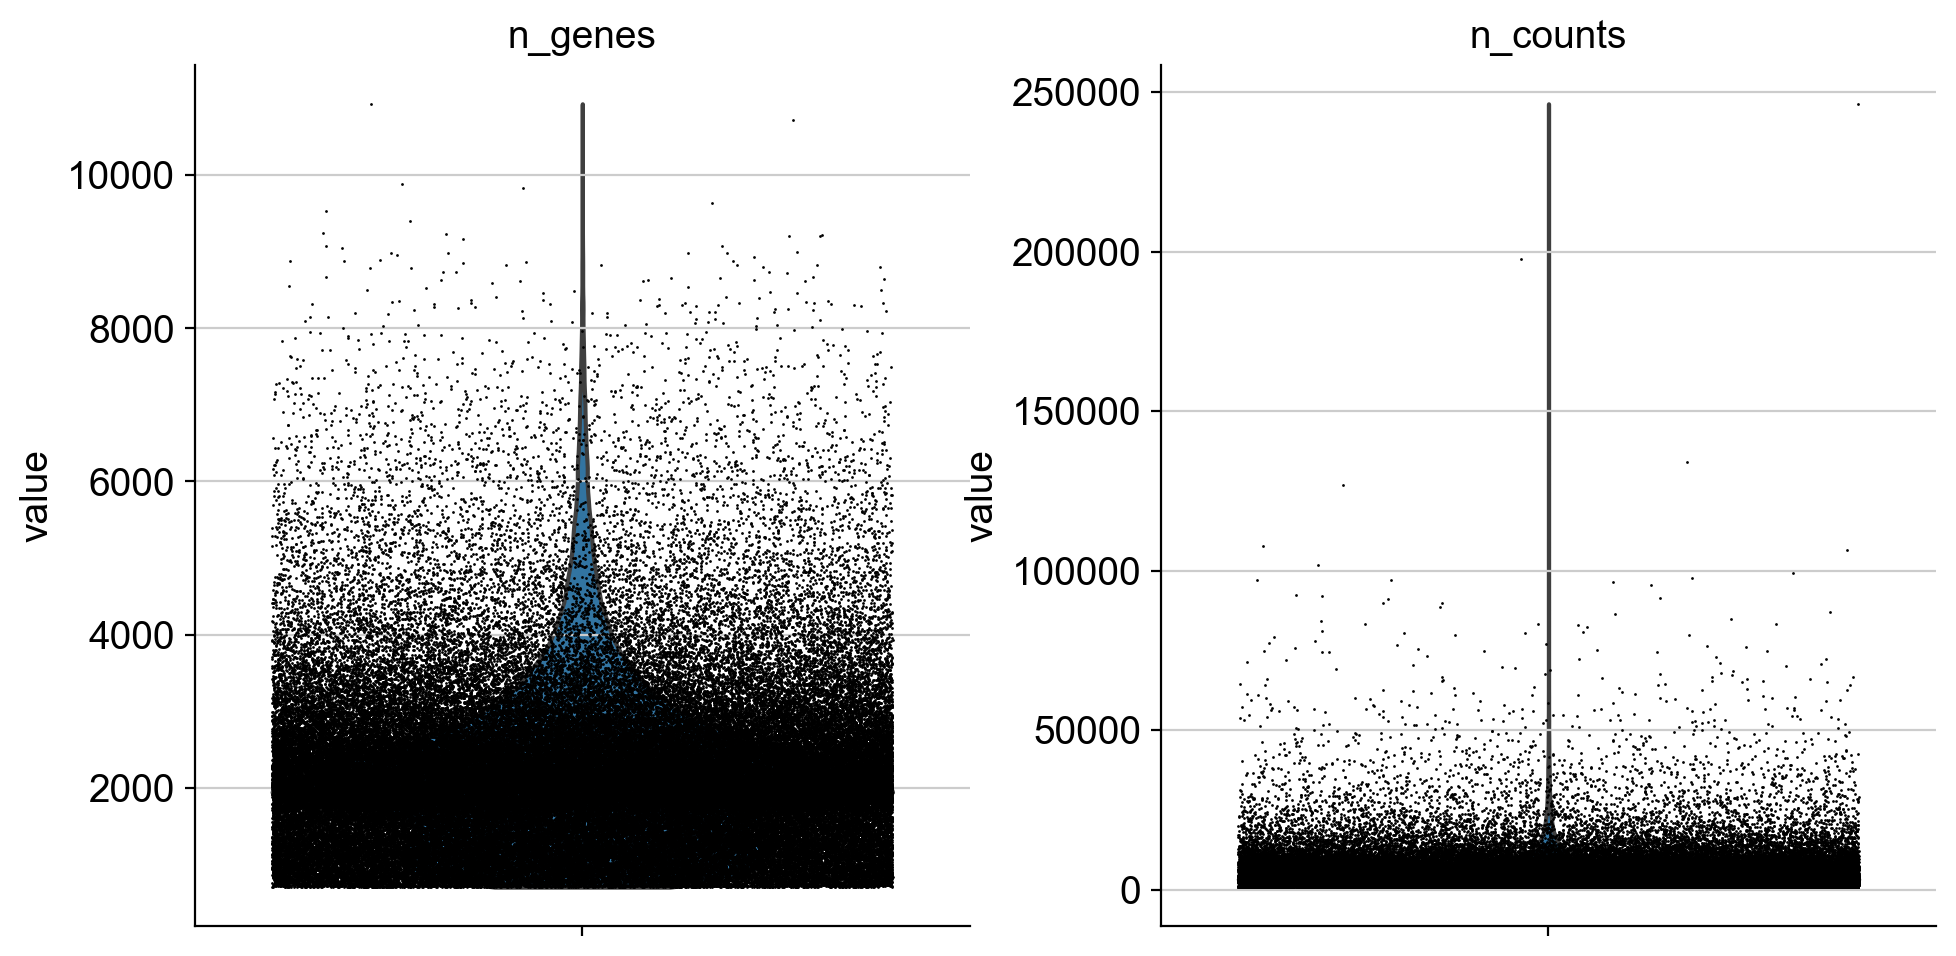

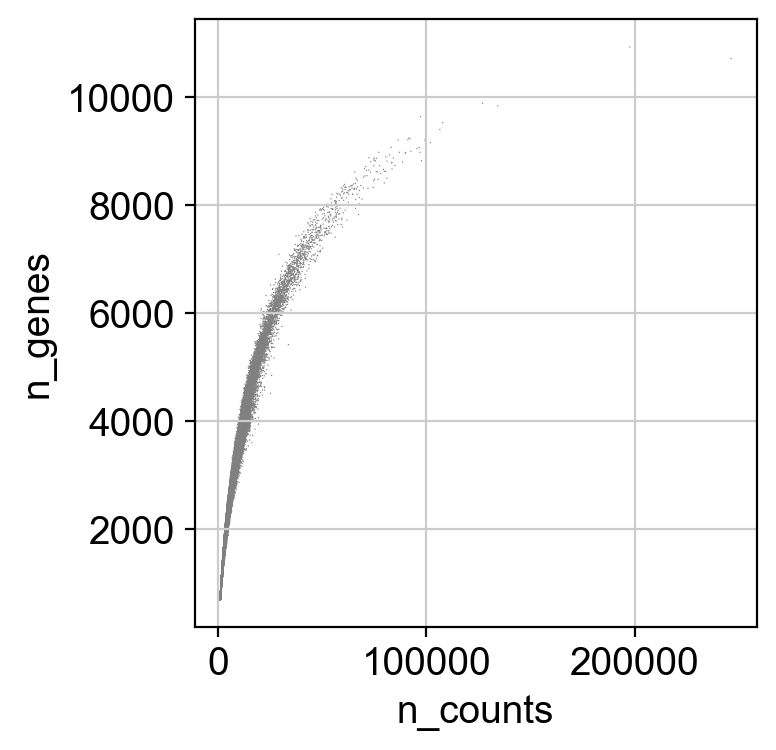

In [5]:
sc.pl.violin(adata, ["n_genes", "n_counts"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [6]:
adata = adata[adata.obs["n_genes"] < 6500, :]
adata = adata[adata.obs["n_counts"] < 40000, :]

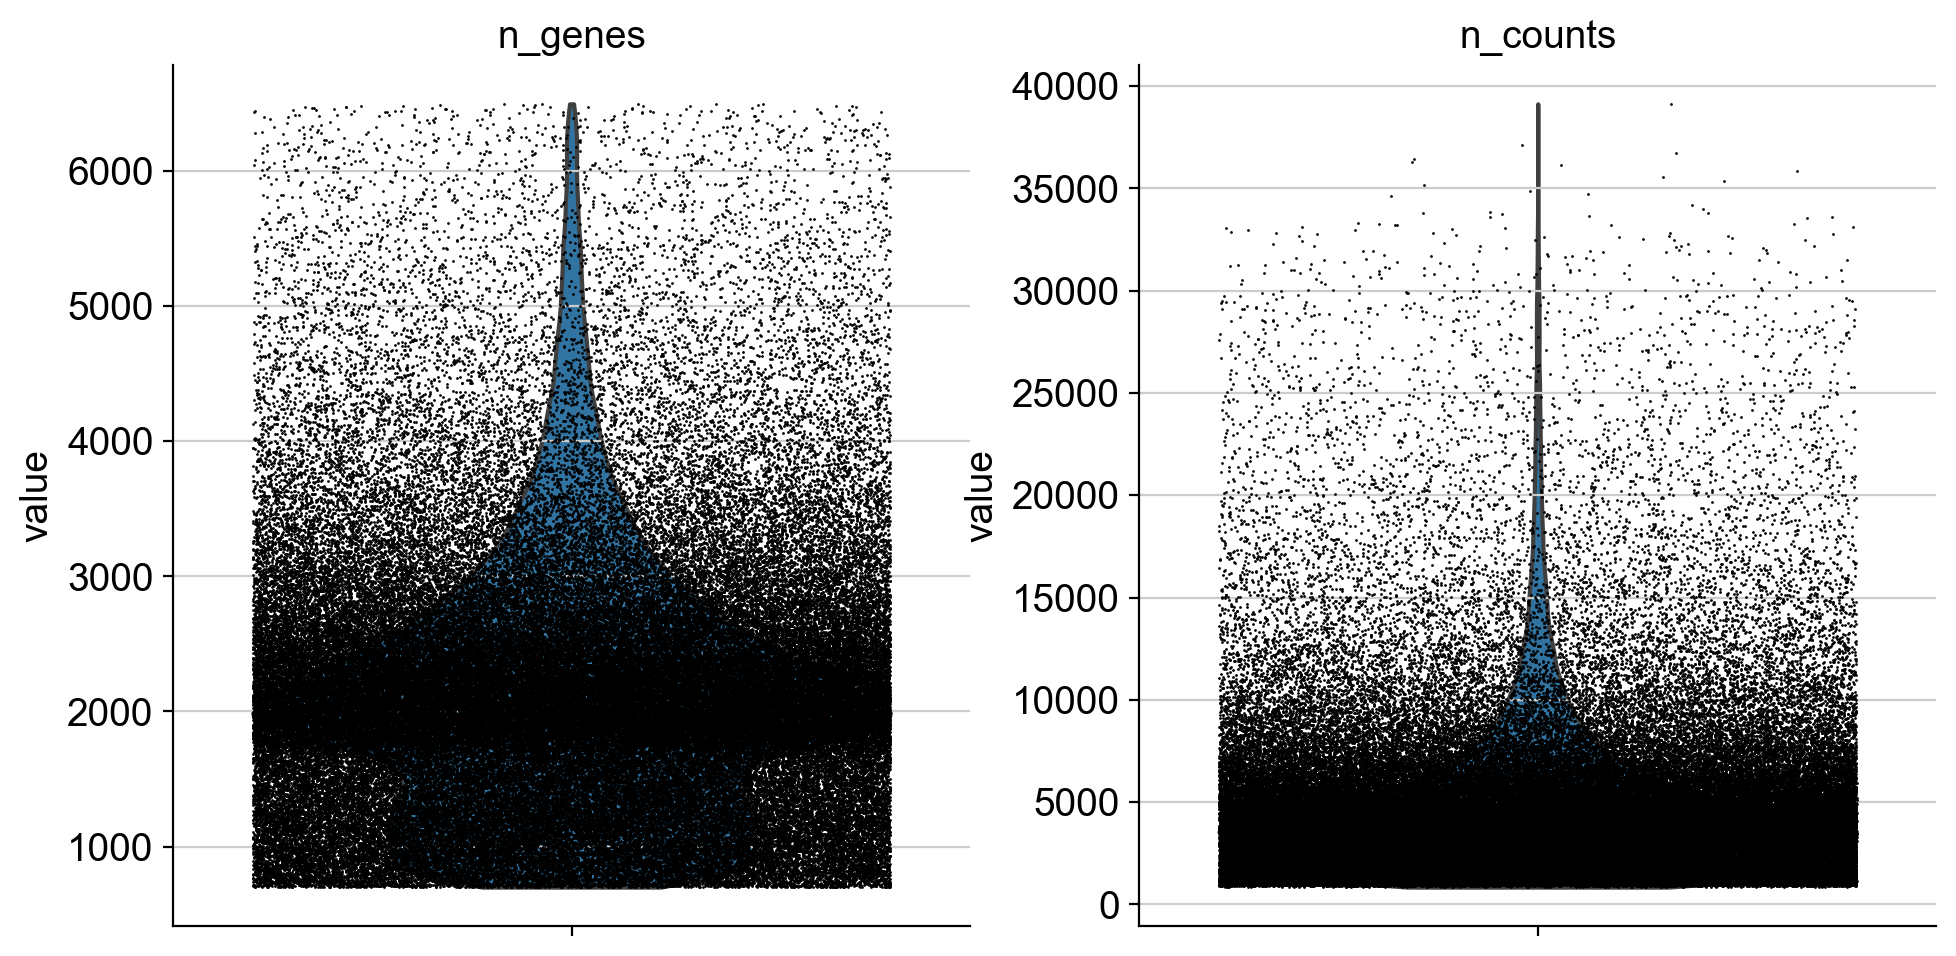

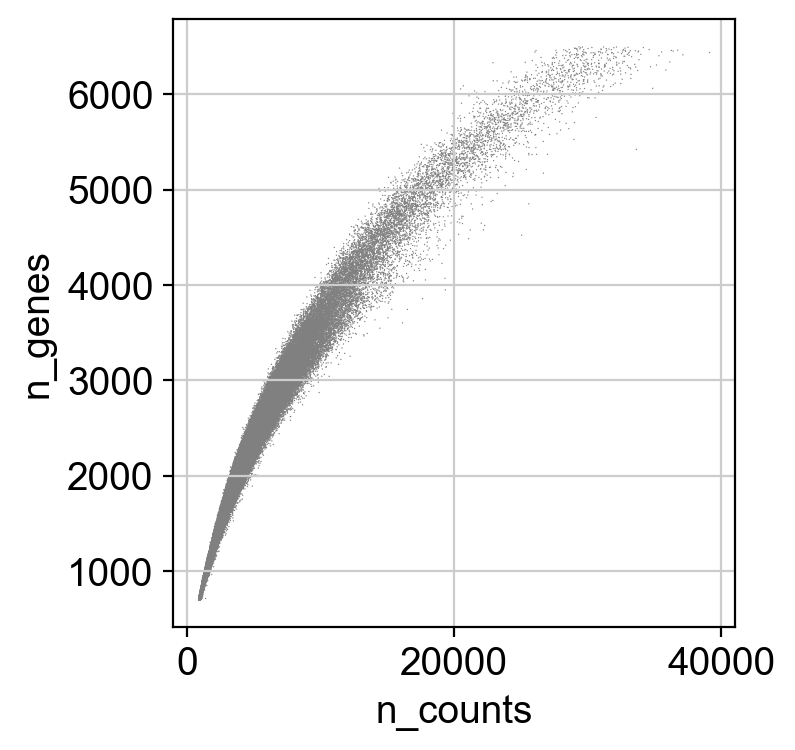

In [7]:
sc.pl.violin(adata, ["n_genes", "n_counts"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x="n_counts", y="n_genes")

In [7]:
import scrublet as scr

counts_matrix = adata.X
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

doublet_scores, predicted_doublets = scrub.scrub_doublets(min_cells=8, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=40)

adata.obs["doublet"] = scrub.predicted_doublets_
adata.obs["doublet_score"] = scrub.doublet_scores_obs_

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.7%
Elapsed time: 16.5 seconds


C:\Users\TLab\AppData\Local\Temp\ipykernel_21160\1727709204.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet"] = scrub.predicted_doublets_


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

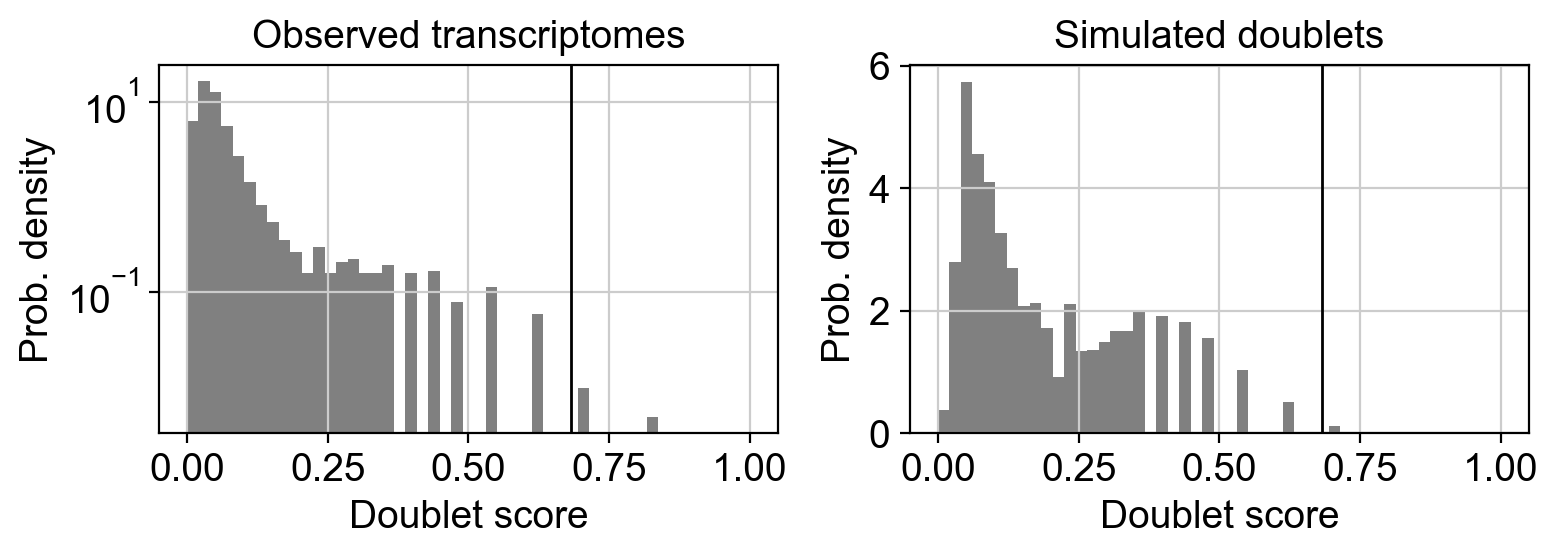

In [8]:
scrub.plot_histogram()

In [8]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.write_h5ad(data_path + "Marmoset_V1.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

normalizing by total count per cell


C:\Ryan\GitHub\scanpy\scanpy\preprocessing\_simple.py:523: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


    finished (0:00:07): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:23)
computing neighbors
    using 'X_pca' with n_pcs = 40


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:47)
running Leiden clustering
    finished: found 31 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:13)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


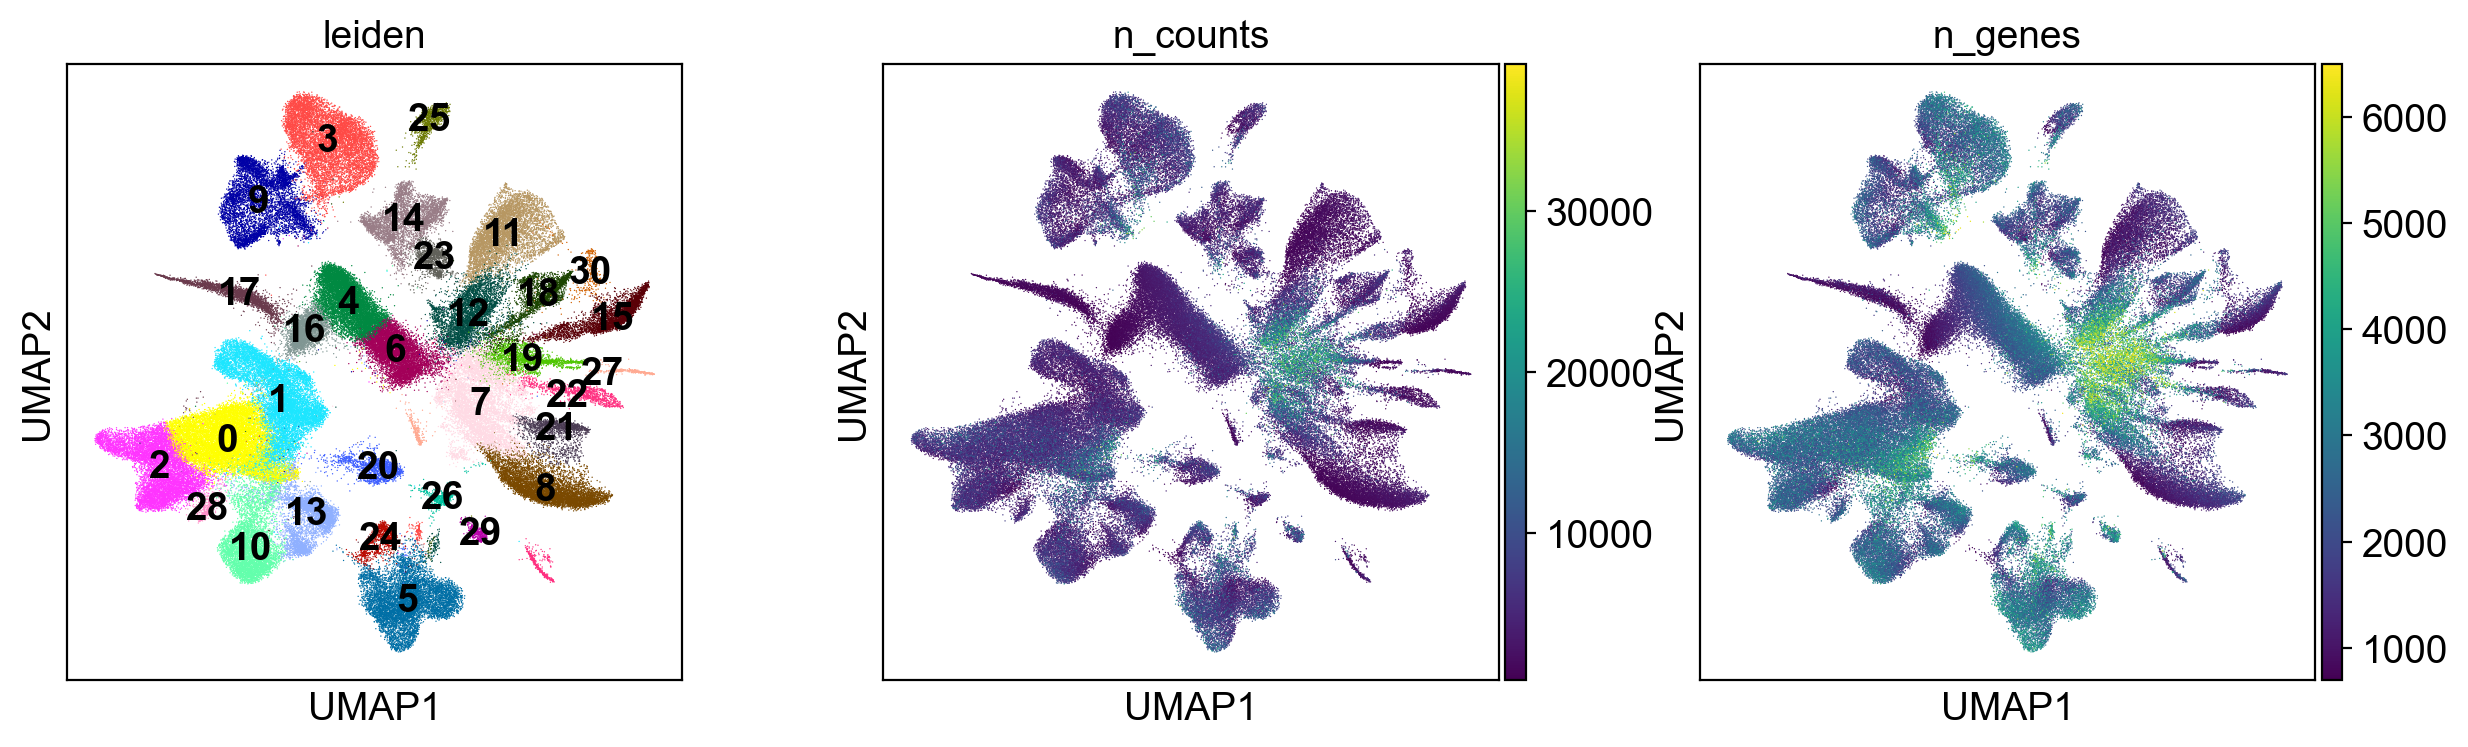

In [9]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden", "n_counts", "n_genes"], legend_loc="on data")
# sc.pl.umap(adata, color=["leiden", "n_counts", "n_genes", "doublet_score"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


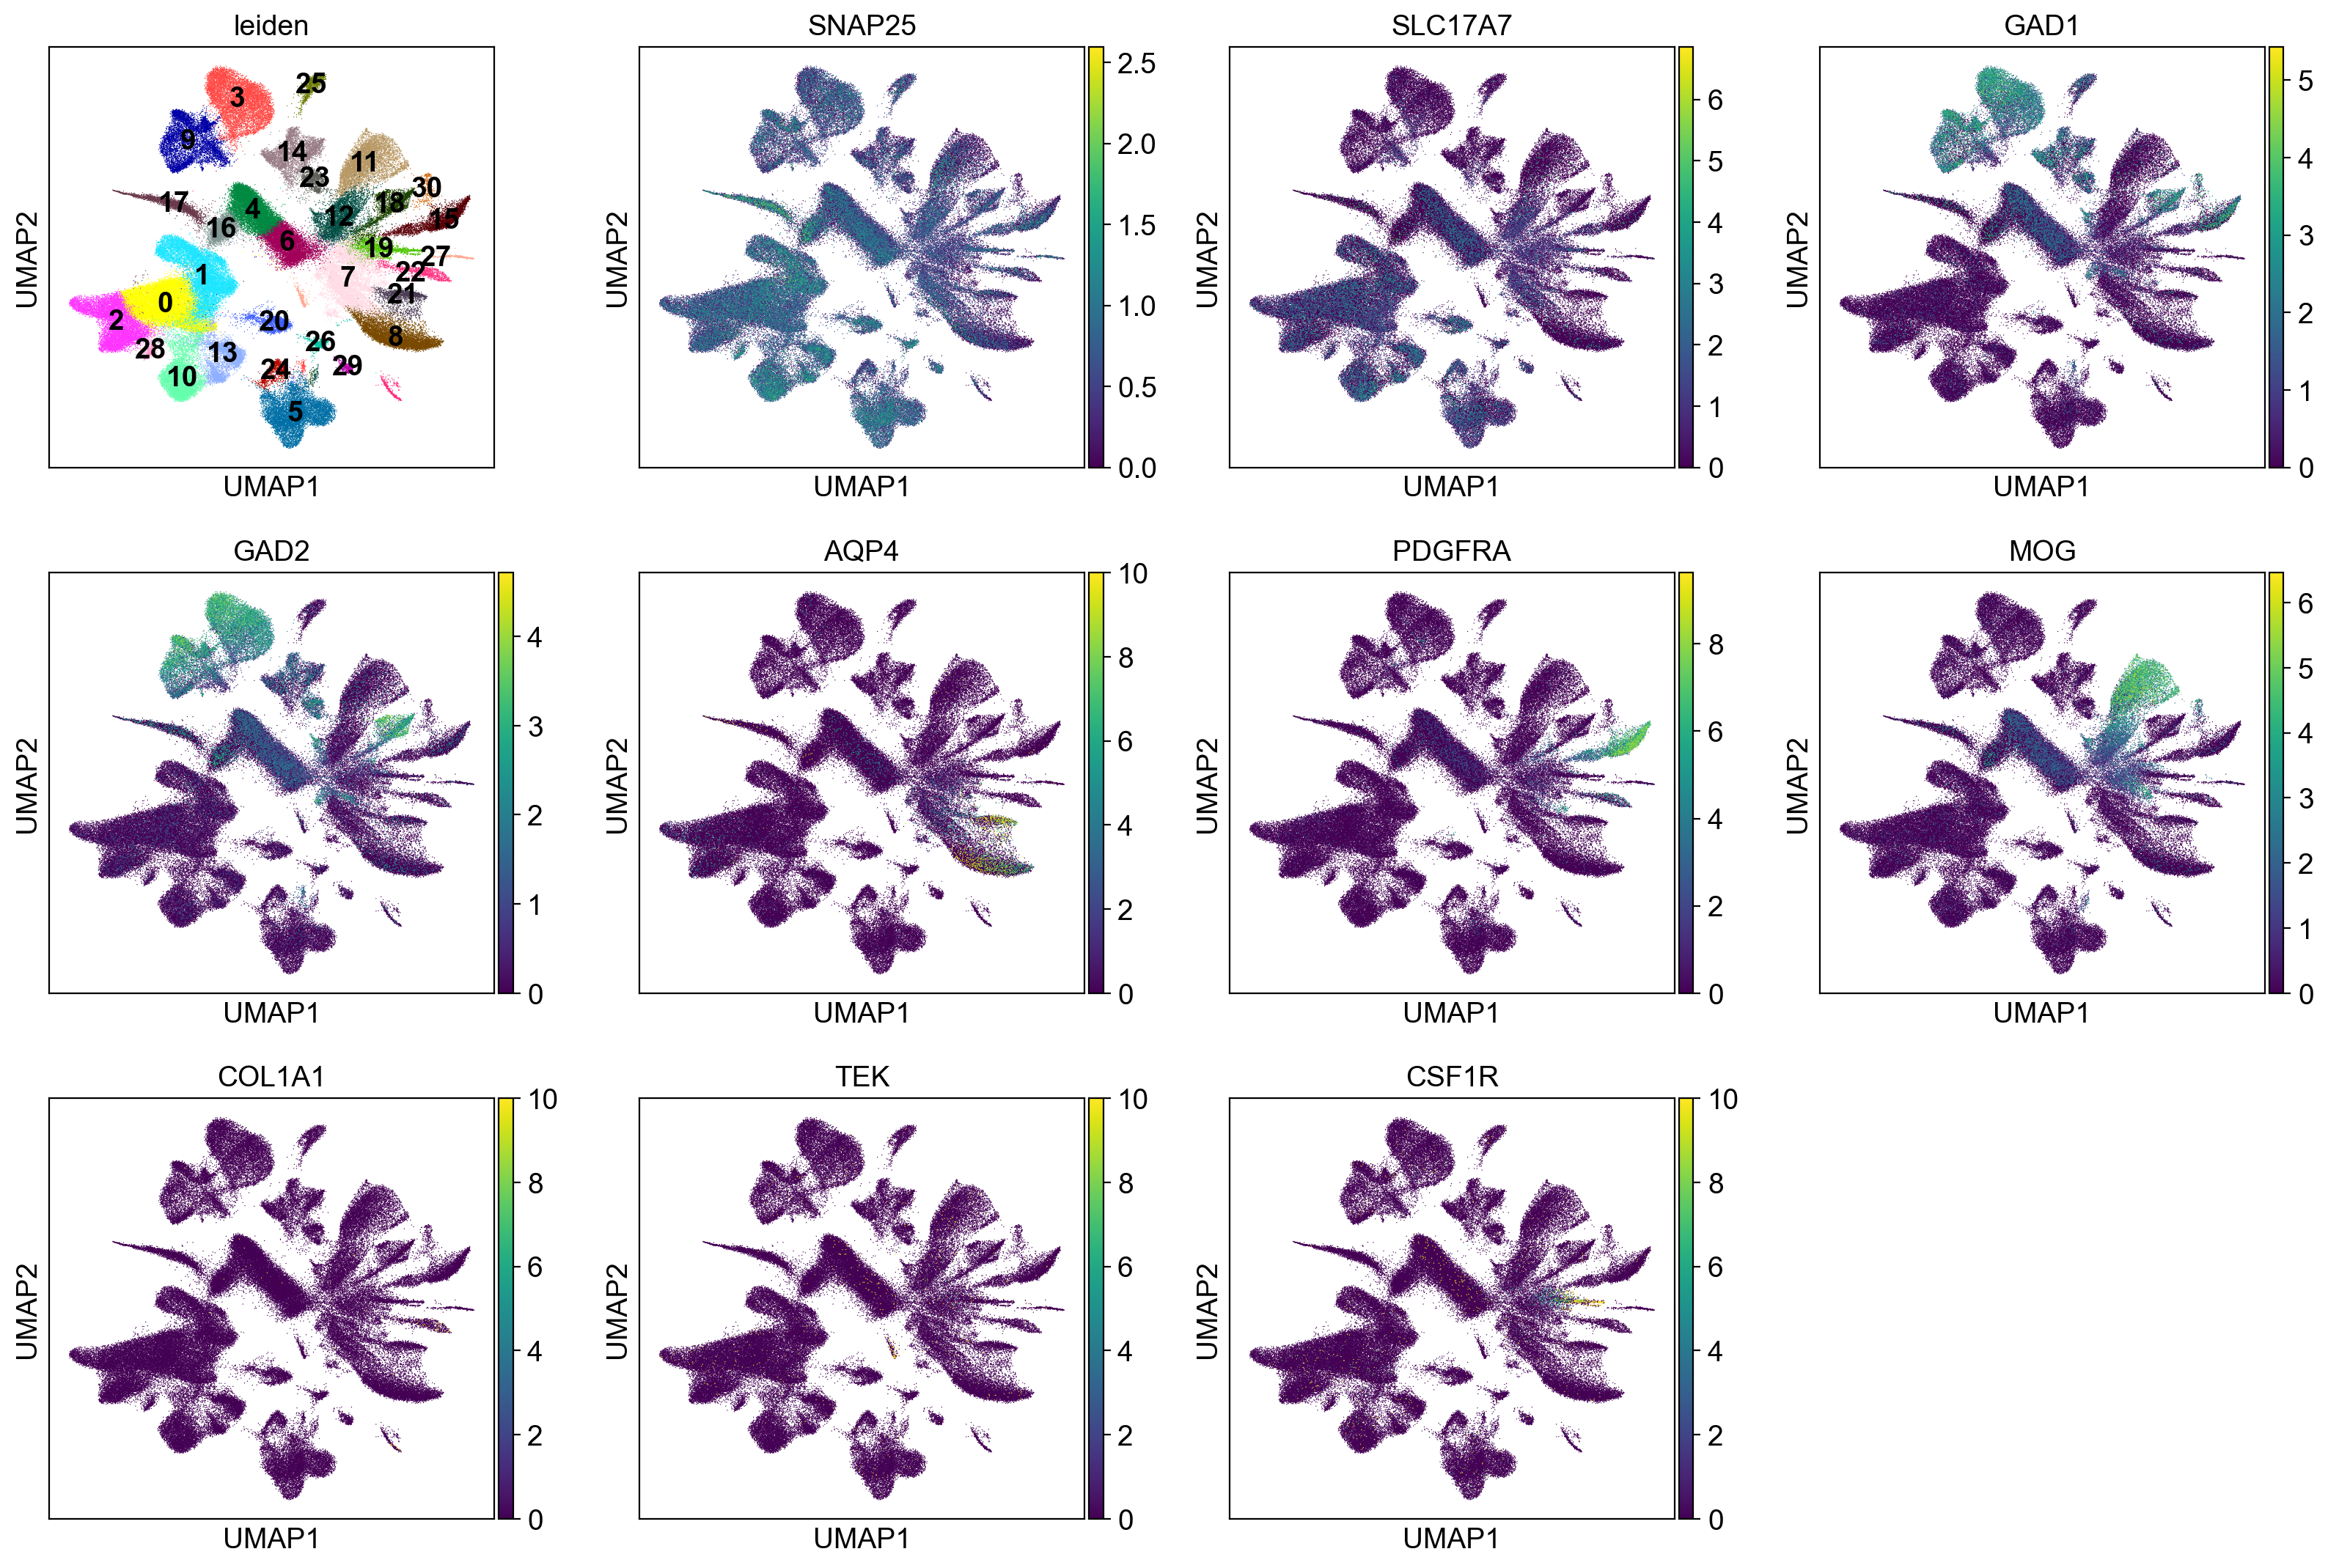

In [12]:
class_markers = [
                 "SNAP25", "SLC17A7", # glutamatergic neurons
                 "GAD1", "GAD2", # GABAergic neurons
                 "AQP4", # astrocytes
                 "PDGFRA", # OPCs
                 "MOG", # oligodendrocytes
                 "COL1A1", # vascular & leptomeningeal cells
                 "TEK", # endothelial cells
                 "CSF1R", # microglia
                ]

sc.pl.umap(adata, color=["leiden"] + class_markers, legend_loc="on data", vmin=0)